# Classifying Amazon Reviews

## Buisness Understanding

## Data Understanding

## Data Preparation

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For working with dictionaries
import collections
import operator

# For text cleaning
import re
import math
import nltk 
from nltk.corpus import stopwords
import string
from nltk import word_tokenize
from nltk import FreqDist
import string
#from nltk.stem.wordnet import WordNetLemmatizer


# WordCloud Visualization
from wordcloud import WordCloud

# Activate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# Term Features Matrix + Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fmartinezflores\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Data Extraction

##### This data set has been downloaded from the Amazon ficial web site

In [3]:
amazon_reviews_df = pd.read_table('C:/Users/fmartinezflores/Documents/Flatiron/DS-Deloitte-1003-c3/ClusteringAmazonReviews_2/ClusteringAmazonReviews/amazon_alexa.tsv')


amazon_reviews_df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# Data frame overview. Column information, name-data type.
amazon_reviews_df.info()

# Counting missing values
amazon_reviews_df.isna().sum()

# Removing duplicate records
amazon_reviews_df = amazon_reviews_df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


### Reviews Overview

In [5]:
_reviews = amazon_reviews_df['verified_reviews']

for i in range(10):
    print(_reviews[i])
    print('--------------')
  

Love my Echo!
--------------
Loved it!
--------------
Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.
--------------
I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.
--------------
Music
--------------
I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.
--------------
Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be 

### General Analysis

#### Counting Ratings

Text(0.5, 1.0, 'Raitings')

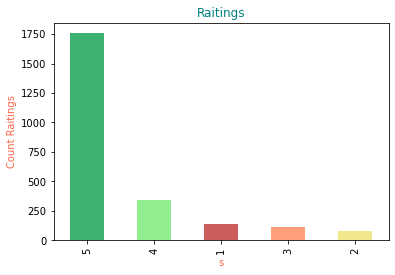

In [6]:
# Plotting
amazon_reviews_df['rating'].value_counts().plot(kind='bar', 

                                                color=['mediumseagreen','lightgreen', 'indianred', 'lightsalmon',  'khaki']);
# Graph attributes
plt.xlabel('s', color='tomato')
plt.ylabel('Count Raitings', color='tomato')
plt.title('Raitings', color='teal')

#### Counting Feedback

Text(0.5, 1.0, 'Feedback')

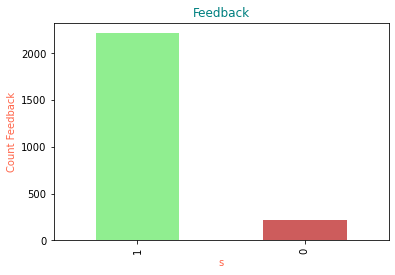

In [7]:
# TRANSFORMAR EN PIE CHART: POSITIVE AND NEGATIVE FEEDBACK
# Plotting
amazon_reviews_df['feedback'].value_counts().plot(kind='bar', color=['lightgreen', 'indianred']);

# Graph attributes
plt.xlabel('s', color='tomato')
plt.ylabel('Count Feedback', color='tomato')
plt.title('Feedback', color='teal')

In [8]:
# En general la mayoria de als reseñas son pósitivas

### Ratings By Date

In [9]:
# Changing string date to Date
amazon_reviews_df['date'] = pd.to_datetime(amazon_reviews_df['date'])

Text(0.5, 1.0, 'Ratings By Date')

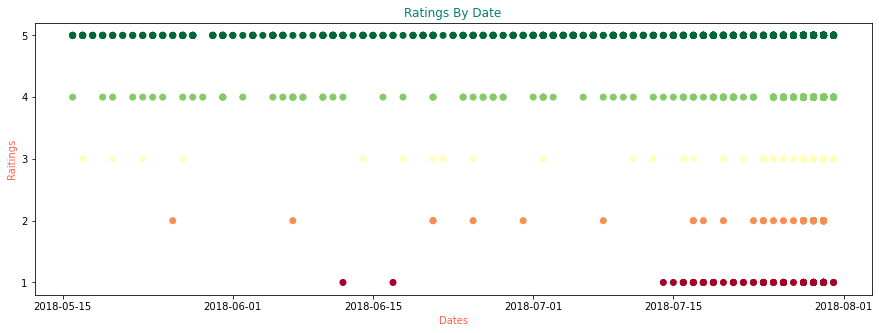

In [10]:
# Visualizing data
dates = amazon_reviews_df['date'].sort_values()
ratings = amazon_reviews_df['rating']

# Graph attributes
plt.figure(figsize=(15,5))
plt.yticks([1, 2, 3, 4, 5])
plt.scatter(dates, ratings, 
         c = ratings,
         cmap = 'RdYlGn')

plt.xlabel('Dates', color='tomato')
plt.ylabel('Raitings', color='tomato')
plt.title('Ratings By Date', color='teal')

In [11]:
# x de cada y reseñas son malas cada día?mes?3 días

In [12]:
# Aumentó el número de personas que hacen reviews y aumentaron las reseñas negativas

### Analysing Reviews

'\nTop 5 variations with most feedback:\n 1. Fire TV Stick\n 2. Black Plus\n 3. Black \n 4. Black Show\n 5. Black Dot\n'

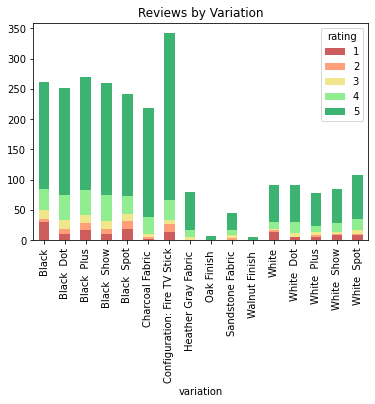

In [13]:
# Reviews by variation

# Visualizing data
amazon_reviews_df.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

"""
Top 5 variations with most feedback:
 1. Fire TV Stick
 2. Black Plus
 3. Black 
 4. Black Show
 5. Black Dot
"""

'\n- The feedback medians are between the 10 -45\n'

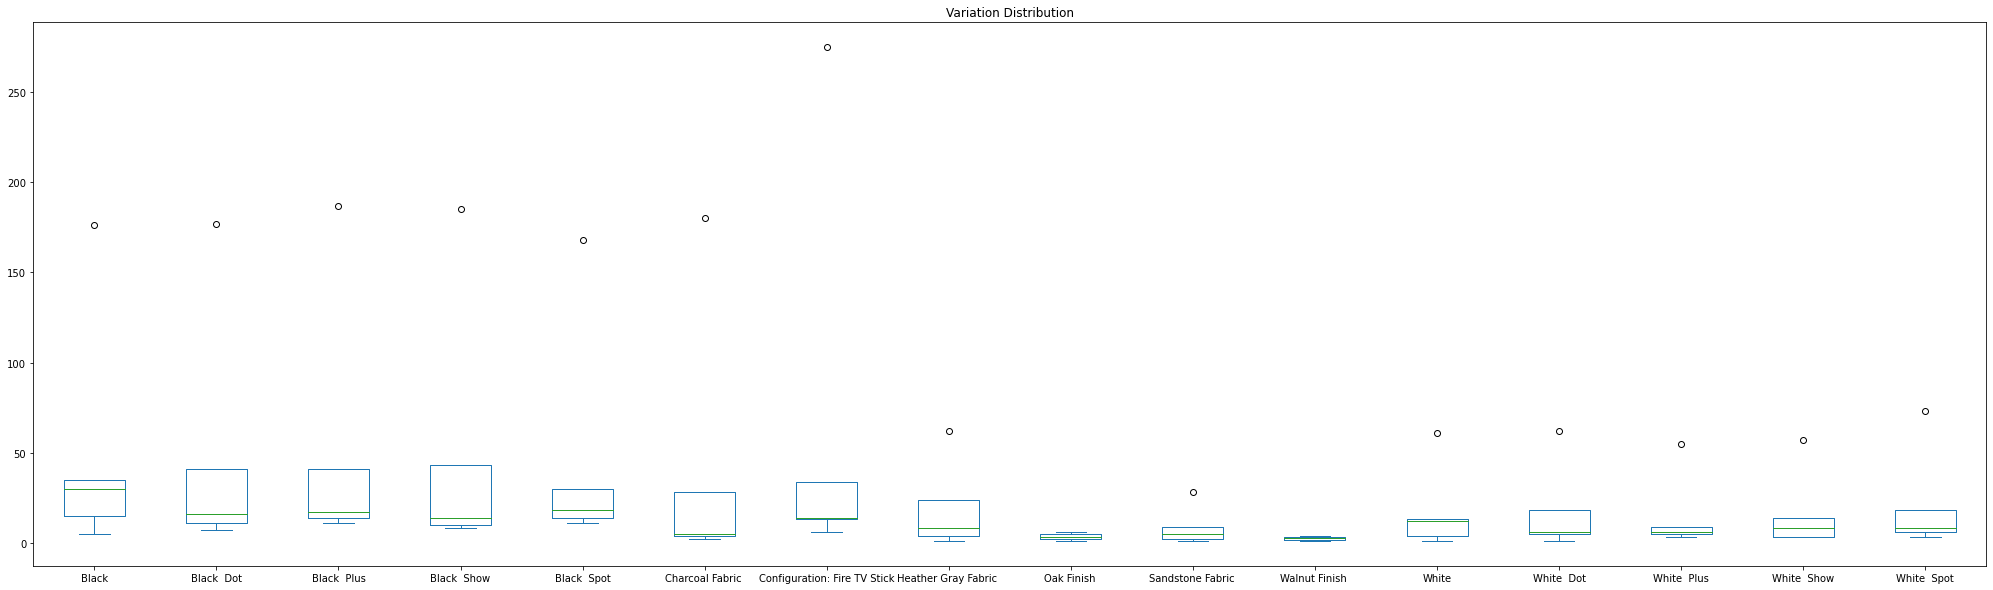

In [14]:
# Graph attributes

amazon_reviews_df.groupby(['rating', 'variation']).size().unstack().plot(kind='box', figsize=(35,10), 
                                                                         title = 'Variation Distribution') # SIZE (X,Y)

#amazon_reviews_df.boxplot(column='rating')
# BOXPLOT PARA UNA SOLO EMPRESA O LAS EMPRESAS MAS INTERESANTES

"""
- The feedback medians are between the 10 -45
"""    
# What are those outliers? What do they mean?

### Analysis by Periods of time

In [15]:
"""
Each period takes 2 weeks, have 5 periods:

Period 1: 2018-05-15 - 2018-06-01
Period 2: 2018-06-01 - 2018-06-15
Period 3: 2018-06-15 - 2018-07-01
Period 4: 2018-07-01 - 2018-07-15
Period 5: 2018-07-15 - 2018-08-01
"""

period_01 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-05-15') & (amazon_reviews_df['date'] < '2018-06-01')]
period_02 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-06-01') & (amazon_reviews_df['date'] < '2018-06-15')]
period_03 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-06-15') & (amazon_reviews_df['date'] < '2018-07-01')]
period_04 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-07-01') & (amazon_reviews_df['date'] < '2018-07-15')]
period_05 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-07-15') & (amazon_reviews_df['date'] < '2018-08-01')]

<AxesSubplot:title={'center':'Period 01 Reviews by Variation'}, xlabel='variation'>

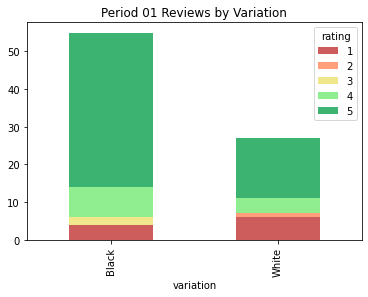

In [16]:
# Visualizing Period 01
period_01.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 01 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 02 Reviews by Variation'}, xlabel='variation'>

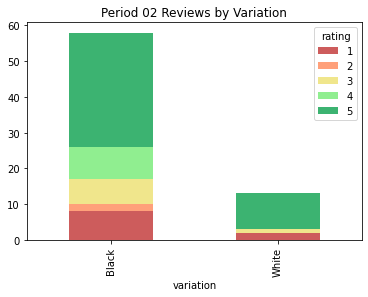

In [17]:
# Visualizing Period 02
period_02.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 02 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 03 Reviews by Variation'}, xlabel='variation'>

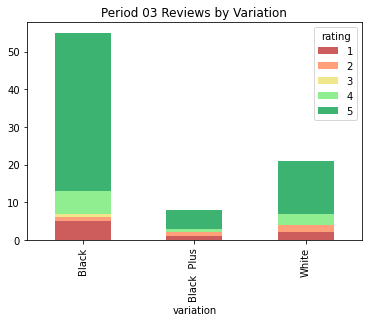

In [18]:
# Visualizing Period 03
period_03.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 03 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 04 Reviews by Variation'}, xlabel='variation'>

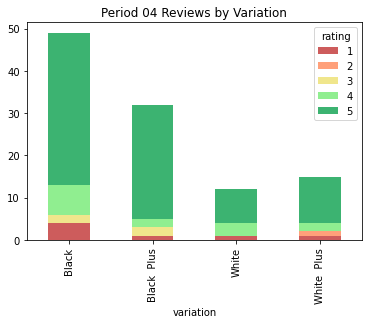

In [19]:
# Visualizing Period 04
period_04.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 04 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 05 Reviews by Variation'}, xlabel='variation'>

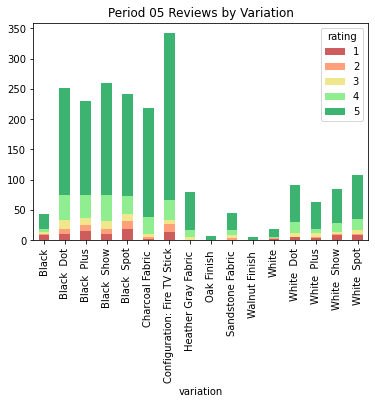

In [20]:
# Visualizing Period 05
period_05.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 05 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

# There has been more reviews in the last period, es comprensible que haya un gran aumento de revs tanto positivas como negativas
# pues las variciones aumentaron de 4 a 16 en el último periodo, esto es X4

## Text Analysis

#### Cleaning and Preprocessing 


In [21]:
"""
1. Create Corpus
2. Create Bag of words from corpus
3. Cleaning: removing punctuation, and lowercasing everything
4. Create Tokens
5. Apply NLP methods such as Stemming and Lemmatization
6. Delete Stop Words

For model:

- what is best? .. tfidf, count vector or binary count (1 or 0 if word apears in a review)? 
"""

'\n1. Create Corpus\n2. Create Bag of words from corpus\n3. Cleaning: removing punctuation, and lowercasing everything\n4. Create Tokens\n5. Apply NLP methods such as Stemming and Lemmatization\n6. Delete Stop Words\n\nFor model:\n\n- what is best? .. tfidf, count vector or binary count (1 or 0 if word apears in a review)? \n'

In [22]:
# Function that cleans one review at a time by calling the next function 
# it returns the set of tokens in the review
def clean_review(review):
        return joining_tokens(review.strip(),s_w)

# Function that joins all the cleaned words (tokens) to use them in a review
def joining_tokens(word, stop_words):
    token = cleaning_token(word, stop_words)
    tokens_from_review = " ".join(token)
    return tokens_from_review    

#  Getting rid of stop words and also removing short or long words. 
# This function cleans one token at a time .
def cleaning_token(raw_token, stop_words):
    raw_token = raw_token.lower() #([a-zA-Z]+(?:'[a-z]+)?)
    raw_tokens = re.findall('[a-záéíóúüñ]+', raw_token)# Making sure synopsis words dont have a-záéíóúüñ 
    clean_tokens = [w for w in raw_tokens if ((not w in stop_words) and len(w)>=3 and len(w)<=24)] # Keeping only words ->
    return clean_tokens 

s_w = stopwords.words('english')
s_w += list(string.punctuation)
# More words that we can ignore to refine our vocabulary 
s_w.extend(['echo','alexa','amazon','dot','purchased','one', 'two','zzzzzzz','zzzz', 'device', 'thing'])

In [23]:
# Creating new column with the cleaned reviews
amazon_reviews_df['cleaned_reviews'] = amazon_reviews_df['verified_reviews'].apply(lambda r: clean_review(r))
amazon_reviews_df.head(5)

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,love
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,loved
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun old learns dinosaurs control lights pl...
4,5,2018-07-31,Charcoal Fabric,Music,1,music


#### Frequency Distributions

In [24]:
def frequency_distributions(reviews, s_w):
    bag_of_words = []    # Vocabulary joins all synopsis words with matching Genre and Decade 
    for rev in reviews :
        token = cleaning_token(rev.strip(),s_w) # striping word from synopsis, this will clean a word at a time
        bag_of_words.extend(token)
    return dict(collections.Counter(bag_of_words))

word_count = frequency_distributions(_reviews, s_w)

# Sorting the words in ascending order according to their number of repetitions, this way we find the most popular words
sorted_word_count = sorted(word_count.items(), key=operator.itemgetter(1), reverse=True)

#len(sorted_repetitions) # type: list, 3758
print("Top 25 Most Popular Words")
top_25 = sorted_word_count[:25]
top_25

Top 25 Most Popular Words


[('love', 746),
 ('great', 565),
 ('like', 387),
 ('use', 372),
 ('music', 369),
 ('works', 311),
 ('easy', 270),
 ('sound', 240),
 ('set', 231),
 ('good', 216),
 ('product', 207),
 ('get', 196),
 ('would', 185),
 ('home', 168),
 ('bought', 164),
 ('time', 156),
 ('speaker', 154),
 ('new', 152),
 ('still', 150),
 ('show', 149),
 ('really', 147),
 ('smart', 143),
 ('much', 142),
 ('also', 139),
 ('play', 138)]

#### Normalized Word Frequency

In [25]:
total_word_count = len(sorted_word_count)


print(f'{"Token     | ":10} Normalized Frequency')
print('________________________________________')
for word in top_25:
    normalized_frequency = word[1] / total_word_count
    print(f'{word[0]:10} {normalized_frequency:^20.4}')

Token     |  Normalized Frequency
________________________________________
love              0.1987       
great             0.1505       
like              0.1031       
use              0.09909       
music             0.0983       
works            0.08284       
easy             0.07192       
sound            0.06393       
set              0.06153       
good             0.05754       
product          0.05514       
get              0.05221       
would            0.04928       
home             0.04475       
bought           0.04369       
time             0.04156       
speaker          0.04102       
new              0.04049       
still            0.03996       
show             0.03969       
really           0.03916       
smart            0.03809       
much             0.03783       
also             0.03703       
play             0.03676       


### Normalizing Words

In [26]:
#import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

#df['text'] = df['text'].apply(lemmatize_words)

In [27]:
#nltk.download('omw-1.4')

In [28]:
# Creating new column with the cleaned reviews
amazon_reviews_df['verified'] = amazon_reviews_df['cleaned_reviews'].apply(lambda r: lemmatize_words(r))
amazon_reviews_df.head(5)

,rating,date,variation,verified_reviews,feedback,cleaned_reviews,verified
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,love,love
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,loved,love
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,sometimes play game answer question correctly ...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun old learns dinosaurs control lights pl...,lot fun old learn dinosaurs control light play...
4,5,2018-07-31,Charcoal Fabric,Music,1,music,music


### Creating Corpus ?? 

In [29]:
"""
N- GRAMS, LEMMAS AND STEMS -> HAVE TO WORK ON IT
"""

'\nN- GRAMS, LEMMAS AND STEMS -> HAVE TO WORK ON IT\n'

In [30]:
""" CAN I PREDICT THE TOPIC OF THE PROBLEM A USER HAD WITH ITS ALEXA ?"""

' CAN I PREDICT THE TOPIC OF THE PROBLEM A USER HAD WITH ITS ALEXA ?'

In [31]:
"""
# Visualizing data
dates = amazon_reviews_df['date'].sort_values()
ratings = amazon_reviews_df['rating']

# Graph attributes
plt.figure(figsize=(10,5))

plt.xlabel('Dates')
plt.ylabel('Raitings')
plt.title('Ratings By Date')

plt.yticks([1, 2, 3, 4, 5])

# Plotting
plt.plot(dates, ratings, marker = 'o', markerfacecolor = 'cornflowerblue', color = 'lightsteelblue')

# Graph attributes
plt.figure(figsize=(10,5))
plt.yticks([1, 2, 3, 4, 5])
plt.scatter(dates, ratings, 
         c = ratings,
         cmap = 'YlGnBu')


plt.xticks([1, 2, 3, 4, 5])
plt.hist(amazon_reviews_df['rating'], bins = 4, color='khaki')

# Bad reviews from 
revs_07_15 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-06-15') & (amazon_reviews_df['date'] <= '2018-08-01')]
bad_revs_07_15 = revs_07_15.loc[(amazon_reviews_df['rating'] <= 3) ]
bad_reviews = bad_revs_07_15['verified_reviews']

#bad_revs_05_15.count()
#main_movie_info.loc[(main_movie_info['Years'] >= 1920) & (main_movie_info['Years'] <= 1929)]

# Calcular promedio de reseñas por empresa (variación) 
# A partir de ese promedio ¿qué empresa tiene más reseñas? ¿qué empresa tiene más reseñas positivas y negativas?
"""
#amazon_reviews_df['variation'].unique()
#dates = amazon_reviews_df['date']
#amazon_reviews_df.style.format({"date": lambda t: t.strftime("%m/%Y")})
#amazon_reviews_df = amazon_reviews_df.sort_values('date', ascending=True)



"\n# Visualizing data\ndates = amazon_reviews_df['date'].sort_values()\nratings = amazon_reviews_df['rating']\n\n# Graph attributes\nplt.figure(figsize=(10,5))\n\nplt.xlabel('Dates')\nplt.ylabel('Raitings')\nplt.title('Ratings By Date')\n\nplt.yticks([1, 2, 3, 4, 5])\n\n# Plotting\nplt.plot(dates, ratings, marker = 'o', markerfacecolor = 'cornflowerblue', color = 'lightsteelblue')\n\n# Graph attributes\nplt.figure(figsize=(10,5))\nplt.yticks([1, 2, 3, 4, 5])\nplt.scatter(dates, ratings, \n         c = ratings,\n         cmap = 'YlGnBu')\n\n\nplt.xticks([1, 2, 3, 4, 5])\nplt.hist(amazon_reviews_df['rating'], bins = 4, color='khaki')\n\n# Bad reviews from \nrevs_07_15 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-06-15') & (amazon_reviews_df['date'] <= '2018-08-01')]\nbad_revs_07_15 = revs_07_15.loc[(amazon_reviews_df['rating'] <= 3) ]\nbad_reviews = bad_revs_07_15['verified_reviews']\n\n#bad_revs_05_15.count()\n#main_movie_info.loc[(main_movie_info['Years'] >= 1920) & (mai

## Modeling

#### TF-IDF

In [38]:
# Transforming
# initialize the vectorizer
vectorizer = TfidfVectorizer()

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(amazon_reviews_df['verified'])
y = amazon_reviews_df[['feedback']]

#X.shape # There are 2435 vectors (one for each review), each with 828 dimensions (one for each word).
#X[0]
#vectorizer.get_feature_names_out()

array(['abay', 'abc', 'abd', ..., 'zigbee', 'zonked', 'útil'],
      dtype=object)

#### Creating training and test sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
#X_train

In [53]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 10)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

[Text(0.81640625, 0.9545454545454546, 'X[1571] <= 0.107\nentropy = 0.428\nsamples = 1704\nvalue = [149, 1555]'),
 Text(0.6953125, 0.8636363636363636, 'X[1157] <= 0.097\nentropy = 0.511\nsamples = 1301\nvalue = [148, 1153]'),
 Text(0.546875, 0.7727272727272727, 'X[2223] <= 0.112\nentropy = 0.582\nsamples = 1050\nvalue = [146, 904]'),
 Text(0.40625, 0.6818181818181818, 'X[2766] <= 0.11\nentropy = 0.551\nsamples = 1033\nvalue = [132, 901]'),
 Text(0.28125, 0.5909090909090909, 'X[827] <= 0.017\nentropy = 0.511\nsamples = 994\nvalue = [113, 881]'),
 Text(0.25, 0.5, 'X[2481] <= 0.197\nentropy = 0.549\nsamples = 890\nvalue = [113, 777]'),
 Text(0.1875, 0.4090909090909091, 'X[1529] <= 0.203\nentropy = 0.533\nsamples = 883\nvalue = [107, 776]'),
 Text(0.15625, 0.3181818181818182, 'X[1132] <= 0.151\nentropy = 0.561\nsamples = 816\nvalue = [107, 709]'),
 Text(0.125, 0.22727272727272727, 'X[2313] <= 0.185\nentropy = 0.588\nsamples = 756\nvalue = [107, 649]'),
 Text(0.0625, 0.13636363636363635, 'X[

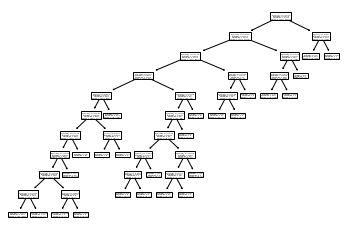

In [55]:
tree.plot_tree(clf)

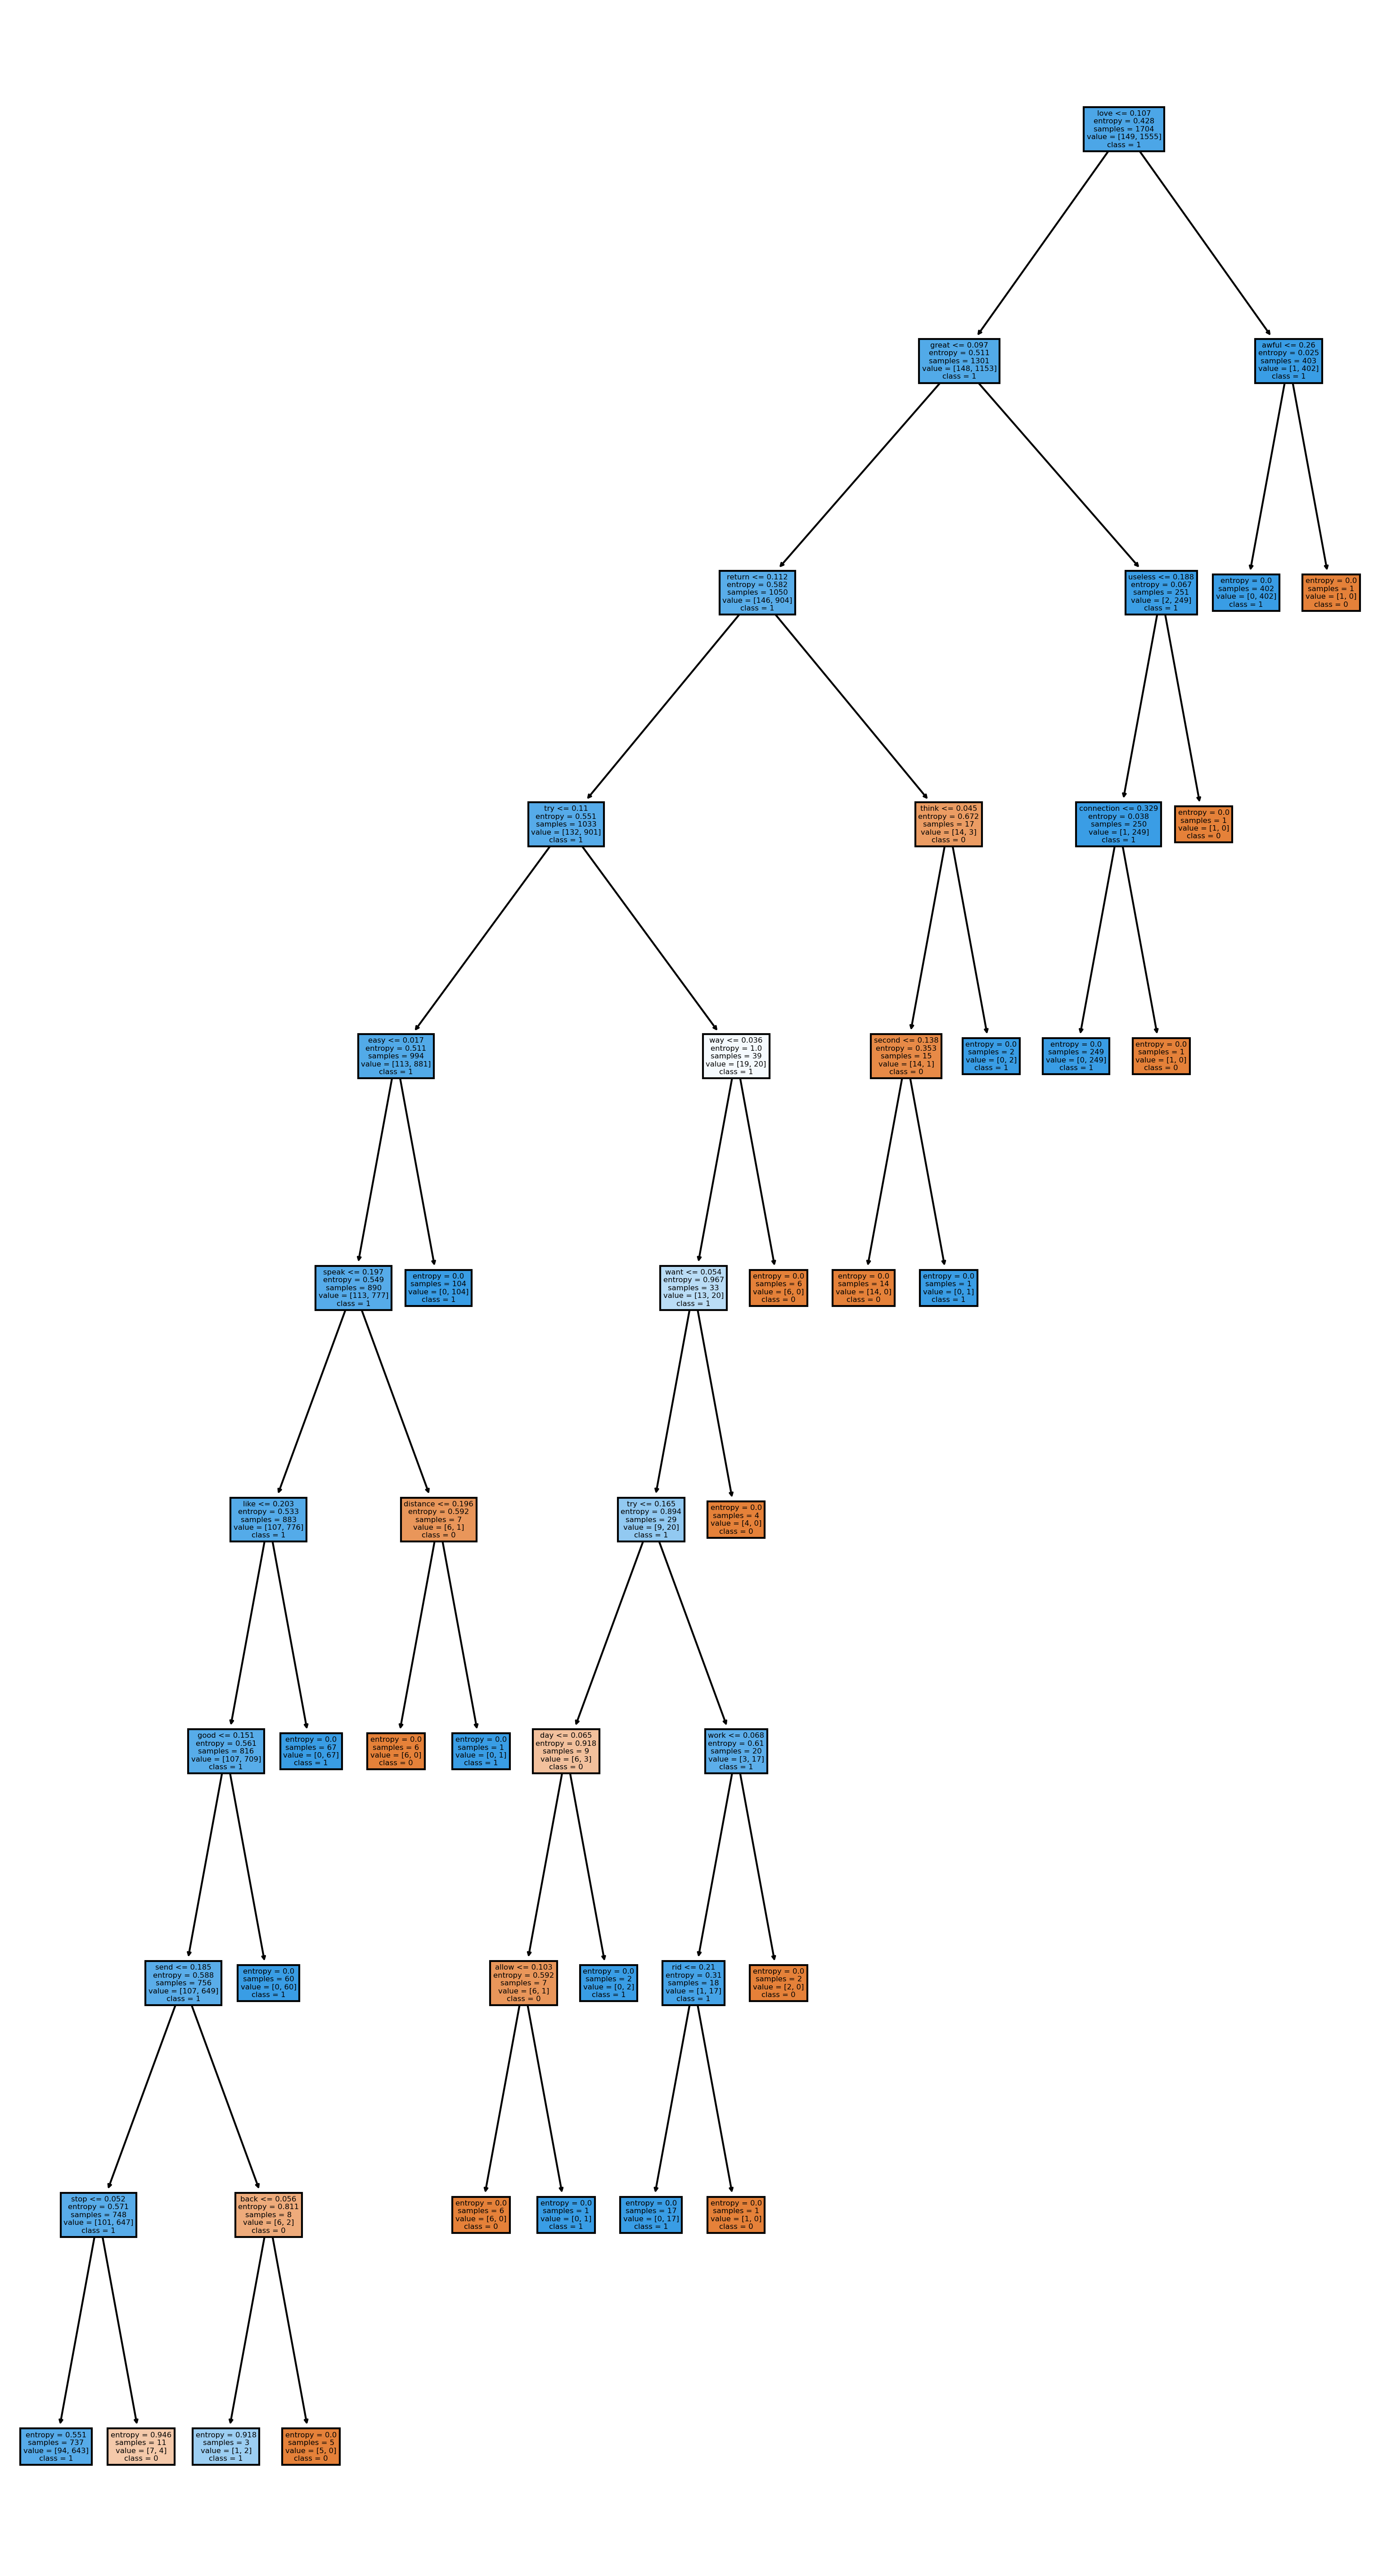

In [59]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (13,25), dpi=300)
tree.plot_tree(clf,
               feature_names = vectorizer.get_feature_names_out(), 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [36]:
"""
# One-hot encode the training data 
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

ohe_df.head()
#X_train_ohe
"""


'\n# One-hot encode the training data \nohe = OneHotEncoder()\n\nohe.fit(X_train)\nX_train_ohe = ohe.transform(X_train).toarray()\n\n# Creating this DataFrame is not necessary its only to show the result of the ohe\nohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))\n\nohe_df.head()\n#X_train_ohe\n'

## Evaluation

## Conclusion